Predicting COVID-19 ICU Admissions:

In a time of unprecedented global crisis, where hospital hallways became overcrowded with patients gasping for air, one question weighed heavily on healthcare professionals: How can we save lives when time is running out, and ICU beds are in short supply?"

Every minute counts when a patient's condition deteriorates. A predictive model that alerts healthcare teams in advance could mean the difference between life and death.
"Our task is simple but vital: develop a machine learning model that predicts ICU admissions for COVID-19 patients before they reach a critical state. Using patient demographics, clinical features, and lab results, we aim to give healthcare providers the tools to make informed, life-saving decisions."

In this analysis, we have used a publicly available dataset to build models predicting ICU admissions based on patient vital signs and demographic features. This paper presents an exploratory data analysis (EDA) that highlights trends and correlations in the dataset, followed by insights from machine learning models built to address the ICU prediction challenge.

![alt text](Microbes-1.jpg)

In [60]:
# Importing necessary libraries
# we import all the necessary libraries and modules required for data manipulation, visualization, and building machine learning models.
import pandas as pd 
import numpy as np 
import pyodbc
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway 
from tabulate import tabulate
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")
np.seterr(all='ignore') 

print("Necessary libraries imported")

Necessary libraries imported


In [2]:
# Database Connection and Loading Data
# We are connecting to a SQL Server database (CapstoneDB) hosted locally on SQLEXPRESS using the pyodbc library
server = 'DPC-L0087\SQLEXPRESS'
database = 'CapstoneDB'
username = 'TestUser'
password = '1234'

# Creating the connection string
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};Trusted_Connection=Yes'
# Establish the connection
conn = pyodbc.connect(conn_str)

# Loading data from a table into pandas DataFrames


query = "SELECT * FROM dbo.CapstoneCovid"
df = pd.read_sql(query, conn)
print("Dataset from a SQL table into pandas DataFrames is loaded.")

Dataset from a SQL table into pandas DataFrames is loaded.


In [4]:
# Displaying Initial Data and Dataset Structure to understand the structure of the dataset.
print("Initial data sample:")
display(df.head(10))  

Initial data sample:


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0,0,0,0,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,0-2,0
1,0,1,60th,0,0,0,0,0,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,2-4,0
2,0,1,60th,0,0,0,0,0,1,1,...,,,,,,,,,4-6,0
3,0,1,60th,0,0,0,0,0,1,1,...,-1,-1,,,,,-1,-1,6-12,0
4,0,1,60th,0,0,0,0,0,1,1,...,-0.238095238,-0.818181818,-0.389966555,0.407557994,-0.23046165,0.096774194,-0.242281528,-0.81443299,ABOVE_12,1
5,1,1,90th,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,0-2,1
6,1,1,90th,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,2-4,1
7,1,1,90th,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,4-6,1
8,1,1,90th,1,0,0,0,0,0,0,...,-0.880952381,-1,-0.906832298,-0.83113228,-0.940966921,-0.817204301,-0.882574283,-1,6-12,1
9,1,1,90th,1,0,0,0,0,1,0,...,0.142857143,-0.797979798,0.315689981,0.200359082,-0.239515043,0.64516129,0.139708776,-0.802316931,ABOVE_12,1


In [5]:
# Displaying the last few rows of the dataset

print("The last few rows of the dataset:")
display(df.tail())

The last few rows of the dataset:


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1920,384,0,50th,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,0-2,0
1921,384,0,50th,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,2-4,0
1922,384,0,50th,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,4-6,0
1923,384,0,50th,1,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,6-12,0
1924,384,0,50th,1,0,0,1,0,0,0,...,-0.547619048,-0.838383838,-0.701863354,-0.585967053,-0.763867684,-0.612903226,-0.551337247,-0.835051546,ABOVE_12,0


In [6]:
# Displaying detailed information about the dataset
print("Information of the dataset:")
print(df.info(verbose=True))  

Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Dtype 
---   ------                            ----- 
 0    PATIENT_VISIT_IDENTIFIER          object
 1    AGE_ABOVE65                       object
 2    AGE_PERCENTIL                     object
 3    GENDER                            object
 4    DISEASE GROUPING 1                object
 5    DISEASE GROUPING 2                object
 6    DISEASE GROUPING 3                object
 7    DISEASE GROUPING 4                object
 8    DISEASE GROUPING 5                object
 9    DISEASE GROUPING 6                object
 10   HTN                               object
 11   IMMUNOCOMPROMISED                 object
 12   OTHER                             object
 13   ALBUMIN_MEDIAN                    object
 14   ALBUMIN_MEAN                      object
 15   ALBUMIN_MIN                       object
 16   ALBUMIN_MAX 

In [7]:
# Displaying Unique Indices 
print("Number of rows and columns in the dataset: ")
print(df.shape)

print("Unique indices in the dataset ")
print(df.index.unique())  

Number of rows and columns in the dataset: 
(1925, 231)
Unique indices in the dataset 
RangeIndex(start=0, stop=1925, step=1)


In [8]:
# Checking for Duplicates focusing on data integrity
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows in the data set: {duplicate_count}")

Empty DataFrame
Columns: [PATIENT_VISIT_IDENTIFIER, AGE_ABOVE65, AGE_PERCENTIL, GENDER, DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4, DISEASE GROUPING 5, DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED, OTHER, ALBUMIN_MEDIAN, ALBUMIN_MEAN, ALBUMIN_MIN, ALBUMIN_MAX, ALBUMIN_DIFF, BE_ARTERIAL_MEDIAN, BE_ARTERIAL_MEAN, BE_ARTERIAL_MIN, BE_ARTERIAL_MAX, BE_ARTERIAL_DIFF, BE_VENOUS_MEDIAN, BE_VENOUS_MEAN, BE_VENOUS_MIN, BE_VENOUS_MAX, BE_VENOUS_DIFF, BIC_ARTERIAL_MEDIAN, BIC_ARTERIAL_MEAN, BIC_ARTERIAL_MIN, BIC_ARTERIAL_MAX, BIC_ARTERIAL_DIFF, BIC_VENOUS_MEDIAN, BIC_VENOUS_MEAN, BIC_VENOUS_MIN, BIC_VENOUS_MAX, BIC_VENOUS_DIFF, BILLIRUBIN_MEDIAN, BILLIRUBIN_MEAN, BILLIRUBIN_MIN, BILLIRUBIN_MAX, BILLIRUBIN_DIFF, BLAST_MEDIAN, BLAST_MEAN, BLAST_MIN, BLAST_MAX, BLAST_DIFF, CALCIUM_MEDIAN, CALCIUM_MEAN, CALCIUM_MIN, CALCIUM_MAX, CALCIUM_DIFF, CREATININ_MEDIAN, CREATININ_MEAN, CREATININ_MIN, CREATININ_MAX, CREATININ_DIFF, FFA_MEDIAN, FFA_MEAN, FFA_MIN, FFA_MAX, FFA_DI

In [9]:
# Displaying Data Types 

print("Data types of each column:")
print(df.dtypes)  

Data types of each column:
PATIENT_VISIT_IDENTIFIER      object
AGE_ABOVE65                   object
AGE_PERCENTIL                 object
GENDER                        object
DISEASE GROUPING 1            object
                               ...  
RESPIRATORY_RATE_DIFF_REL     object
TEMPERATURE_DIFF_REL          object
OXYGEN_SATURATION_DIFF_REL    object
WINDOW                        object
ICU                           object
Length: 231, dtype: object


In [10]:
# Checking missing values and empty strings to see incomplete data. 
print("Number of missing values in each column:")
print(df.isnull().sum())
print("Number of empty strings in each column:")
print((df == '').sum())  

Number of missing values in each column:
PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64
Number of empty strings in each column:
PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64


In [11]:
# Replacing empty Strings with NaN and Identifying Binary Columns
df.replace('', pd.NA, inplace=True)
binary_columns = [col for col in df.columns if df[col].nunique(dropna=True) == 2]
print("Binary columns:", binary_columns)

Binary columns: ['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ICU']


In [12]:
#Creating  a copy of the original dataset  to preserve the raw data while  cleaning 
df_cleaned= df.copy()
print("Columnns in the cleaned data: ")
print(df_cleaned.columns)
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric columns in the cleaned data:", numeric_columns)

Columnns in the cleaned data: 
Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)
Numeric columns in the cleaned data: Index([], dtype='object')


In [16]:
#Categorizing and correctly assigning data types to the columns before proceeding with  analysis.

numeric_cols = [
    'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF',
    'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF',
    'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF',
    'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF',
    'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF',
    'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF',
    'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF',
    'CALCIUM_MEDIAN', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF',
    'CREATININ_MEDIAN', 'CREATININ_MEAN', 'CREATININ_MIN', 'CREATININ_MAX', 'CREATININ_DIFF',
    'FFA_MEDIAN', 'FFA_MEAN', 'FFA_MIN', 'FFA_MAX', 'FFA_DIFF',
    'GGT_MEDIAN', 'GGT_MEAN', 'GGT_MIN', 'GGT_MAX', 'GGT_DIFF',
    'GLUCOSE_MEDIAN', 'GLUCOSE_MEAN', 'GLUCOSE_MIN', 'GLUCOSE_MAX', 'GLUCOSE_DIFF',
    'HEMATOCRITE_MEDIAN', 'HEMATOCRITE_MEAN', 'HEMATOCRITE_MIN', 'HEMATOCRITE_MAX', 'HEMATOCRITE_DIFF',
    'HEMOGLOBIN_MEDIAN', 'HEMOGLOBIN_MEAN', 'HEMOGLOBIN_MIN', 'HEMOGLOBIN_MAX', 'HEMOGLOBIN_DIFF','ICU',
    'INR_MEDIAN', 'INR_MEAN', 'INR_MIN', 'INR_MAX', 'INR_DIFF',
    'LACTATE_MEDIAN', 'LACTATE_MEAN', 'LACTATE_MIN', 'LACTATE_MAX', 'LACTATE_DIFF',
    'LEUKOCYTES_MEDIAN', 'LEUKOCYTES_MEAN', 'LEUKOCYTES_MIN', 'LEUKOCYTES_MAX', 'LEUKOCYTES_DIFF',
    'LINFOCITOS_MEDIAN', 'LINFOCITOS_MEAN', 'LINFOCITOS_MIN', 'LINFOCITOS_MAX', 'LINFOCITOS_DIFF',
    'NEUTROPHILES_MEDIAN', 'NEUTROPHILES_MEAN', 'NEUTROPHILES_MIN', 'NEUTROPHILES_MAX', 'NEUTROPHILES_DIFF',
    'P02_ARTERIAL_MEDIAN', 'P02_ARTERIAL_MEAN', 'P02_ARTERIAL_MIN', 'P02_ARTERIAL_MAX', 'P02_ARTERIAL_DIFF',
    'P02_VENOUS_MEDIAN', 'P02_VENOUS_MEAN', 'P02_VENOUS_MIN', 'P02_VENOUS_MAX', 'P02_VENOUS_DIFF',
    'PC02_ARTERIAL_MEDIAN', 'PC02_ARTERIAL_MEAN', 'PC02_ARTERIAL_MIN', 'PC02_ARTERIAL_MAX', 'PC02_ARTERIAL_DIFF',
    'PC02_VENOUS_MEDIAN', 'PC02_VENOUS_MEAN', 'PC02_VENOUS_MIN', 'PC02_VENOUS_MAX', 'PC02_VENOUS_DIFF',
    'PCR_MEDIAN', 'PCR_MEAN', 'PCR_MIN', 'PCR_MAX', 'PCR_DIFF',
    'PH_ARTERIAL_MEDIAN', 'PH_ARTERIAL_MEAN', 'PH_ARTERIAL_MIN', 'PH_ARTERIAL_MAX', 'PH_ARTERIAL_DIFF',
    'PH_VENOUS_MEDIAN', 'PH_VENOUS_MEAN', 'PH_VENOUS_MIN', 'PH_VENOUS_MAX', 'PH_VENOUS_DIFF',
    'PLATELETS_MEDIAN', 'PLATELETS_MEAN', 'PLATELETS_MIN', 'PLATELETS_MAX', 'PLATELETS_DIFF',
    'POTASSIUM_MEDIAN', 'POTASSIUM_MEAN', 'POTASSIUM_MIN', 'POTASSIUM_MAX', 'POTASSIUM_DIFF',
    'SAT02_ARTERIAL_MEDIAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_ARTERIAL_MIN', 'SAT02_ARTERIAL_MAX', 'SAT02_ARTERIAL_DIFF',
    'SAT02_VENOUS_MEDIAN', 'SAT02_VENOUS_MEAN', 'SAT02_VENOUS_MIN', 'SAT02_VENOUS_MAX', 'SAT02_VENOUS_DIFF',
    'SODIUM_MEDIAN', 'SODIUM_MEAN', 'SODIUM_MIN', 'SODIUM_MAX', 'SODIUM_DIFF',
    'TGO_MEDIAN', 'TGO_MEAN', 'TGO_MIN', 'TGO_MAX', 'TGO_DIFF',
    'TGP_MEDIAN', 'TGP_MEAN', 'TGP_MIN', 'TGP_MAX', 'TGP_DIFF',
    'TTPA_MEDIAN', 'TTPA_MEAN', 'TTPA_MIN', 'TTPA_MAX', 'TTPA_DIFF',
    'UREA_MEDIAN', 'UREA_MEAN', 'UREA_MIN', 'UREA_MAX', 'UREA_DIFF',
    'DIMER_MEDIAN', 'DIMER_MEAN', 'DIMER_MIN', 'DIMER_MAX', 'DIMER_DIFF',
    'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 
    'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
    'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN', 'HEART_RATE_MEDIAN', 
    'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN', 'OXYGEN_SATURATION_MEDIAN',
    'BLOODPRESSURE_DIASTOLIC_MIN', 'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 
    'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN',
    'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 
    'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX', 'OXYGEN_SATURATION_MAX',
    'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF', 
    'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
    'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL', 
    'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL'
]

binary_cols = [
    'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'GENDER', 'AGE_ABOVE65', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 
    'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6'
]
# Converting numeric and binary columns to numeric
df_cleaned[numeric_cols ] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_cleaned[binary_cols] = df_cleaned[binary_cols].apply(pd.to_numeric, errors='coerce')
# Checking the data types after conversion
print("Column data types after conversion:")
print(df_cleaned.dtypes)

Column data types after conversion:
PATIENT_VISIT_IDENTIFIER       object
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object


In [17]:
# Handling missing values by dropping columns with too many missing values
# and allowing up to 30% missing data per column
threshold = 0.7  
df_cleaned = df.dropna(thresh=int((1 - threshold) * len(df)), axis=1)


In [18]:

for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' and col != 'AGE_PERCENTIL':  
        #  categorical columns with the mode
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
        #  numerical columns with the median
    elif df_cleaned[col].dtype != 'object':  
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Ensuring only relevant object columns are converted to numeric
object_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in object_cols:
    if col != 'AGE_PERCENTIL':  # Exclude categorical columns like 'AGE_PERCENTIL'
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

print(f"Shape of the cleaned dataset: {df_cleaned.shape}")

# Checking if 'AGE_PERCENTIL' still has its original values
print(df_cleaned['AGE_PERCENTIL'].head())
print(df_cleaned['ICU'].head())


Shape of the cleaned dataset: (1925, 231)
0    60th
1    60th
2    60th
3    60th
4    60th
Name: AGE_PERCENTIL, dtype: object
0    0
1    0
2    0
3    0
4    1
Name: ICU, dtype: int64


In [20]:
# Renaming columns for better readability
df_cleaned = df_cleaned.rename(columns={
    'AGE_ABOVE65': 'Age_Above_65',
    'AGE_PERCENTIL': 'Age_Percentile',
    'GENDER': 'Gender',
    'DISEASE GROUPING 1': 'Disease_Group_1',
    'DISEASE GROUPING 2': 'Disease_Group_2',
    'DISEASE GROUPING 3': 'Disease_Group_3',
    'DISEASE GROUPING 4': 'Disease_Group_4',
    'DISEASE GROUPING 5': 'Disease_Group_5',
    'DISEASE GROUPING 6': 'Disease_Group_6',

    'ICU': 'ICU_Status',
    'ALBUMIN_MEDIAN': 'Albumin_Median',
    'ALBUMIN_MEAN': 'Albumin_Mean',
    'ALBUMIN_MIN': 'Albumin_Min',
    'ALBUMIN_MAX': 'Albumin_Max',
    'ALBUMIN_DIFF': 'Albumin_Diff',
    'BLOODPRESSURE_DIASTOLIC_DIFF_REL': 'BloodPressure_Diastolic_Diff_Relative',
    'BLOODPRESSURE_SISTOLIC_DIFF_REL': 'BloodPressure_Systolic_Diff_Relative',
    'HEART_RATE_DIFF_REL': 'Heart_Rate_Diff_Relative',
    'RESPIRATORY_RATE_DIFF_REL': 'Respiratory_Rate_Diff_Relative',
    'TEMPERATURE_DIFF_REL': 'Temperature_Diff_Relative',
    'OXYGEN_SATURATION_DIFF_REL': 'Oxygen_Saturation_Diff_Relative',
    'RESPIRATORY_RATE_DIFF': 'Respiratory_Rate_Diff',
   
})

print("Renamed columns:")
display(df_cleaned.head(10))

Renamed columns:


,PATIENT_VISIT_IDENTIFIER,Age_Above_65,Age_Percentile,Gender,Disease_Group_1,Disease_Group_2,Disease_Group_3,Disease_Group_4,Disease_Group_5,Disease_Group_6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BloodPressure_Diastolic_Diff_Relative,BloodPressure_Systolic_Diff_Relative,Heart_Rate_Diff_Relative,Respiratory_Rate_Diff_Relative,Temperature_Diff_Relative,Oxygen_Saturation_Diff_Relative,WINDOW,ICU_Status
0,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0
1,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0
2,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0
3,0,1,60th,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0
4,0,1,60th,0,0,0,0,0,1,1,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,NaN,1
5,1,1,90th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,1
6,1,1,90th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,1
7,1,1,90th,1,0,0,0,0,0,0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,1
8,1,1,90th,1,0,0,0,0,0,0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,NaN,1
9,1,1,90th,1,0,0,0,0,1,0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,NaN,1


In [21]:
# Displaying basic statistical summaries
print("Basic statistical summaries:")
display(df_cleaned.describe()) 

Basic statistical summaries:


,PATIENT_VISIT_IDENTIFIER,Age_Above_65,Gender,Disease_Group_1,Disease_Group_2,Disease_Group_3,Disease_Group_4,Disease_Group_5,Disease_Group_6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BloodPressure_Diastolic_Diff_Relative,BloodPressure_Systolic_Diff_Relative,Heart_Rate_Diff_Relative,Respiratory_Rate_Diff_Relative,Temperature_Diff_Relative,Oxygen_Saturation_Diff_Relative,WINDOW,ICU_Status
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,0.0,1925.000000
mean,192.000000,0.467532,0.368831,0.108052,0.028052,0.097662,0.019740,0.127792,0.046753,0.212468,...,-0.853135,-0.927396,-0.862793,-0.817028,-0.882635,-0.828278,-0.853768,-0.927257,NaN,0.267532
std,111.168431,0.499074,0.482613,0.310527,0.165164,0.296935,0.139143,0.333945,0.211165,0.409160,...,0.277888,0.243625,0.279860,0.362789,0.233740,0.375047,0.276740,0.244136,NaN,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.833333,-0.939394,-0.860870,-0.822211,-0.896500,-0.870968,-0.839752,-0.941300,NaN,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Distribution of ICU Admissions: This bar chart shows the distribution of patients who were admitted to the ICU versus those who were not (0 = Non-ICU, 1 = ICU).. It is evident from the chart that a larger proportion of the patients (551) did not require ICU care, compared to the 235 patients who were admitted.
Insights
Most of the cases in the dataset did not escalate to severe levels requiring intensive medical intervention.
Around 500 patients required ICU admission, indicating a significant but smaller proportion.
This imbalance between the classes (non-ICU vs. ICU) suggests that the dataset is imbalanced, which is critical to consider when building predictive models. 

int64
[0 1]
ICU Status Value Counts:
ICU_Status
0    1410
1     515
Name: count, dtype: int64


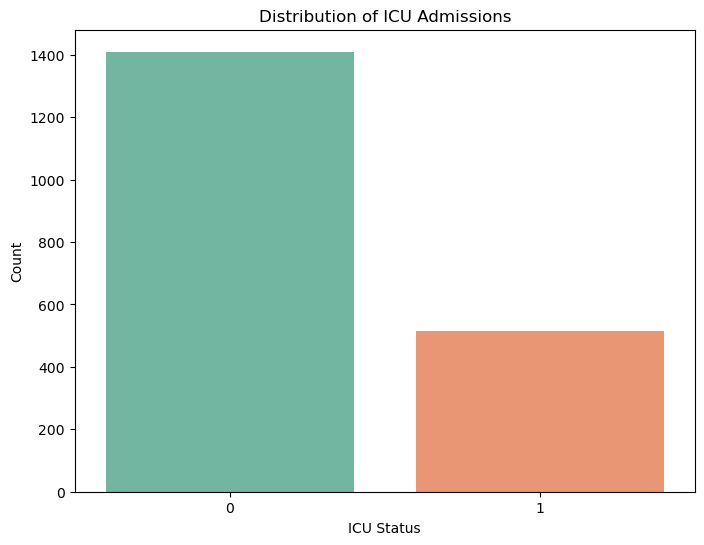

In [22]:
# Checking the distribution of the target variable (ICU_Status)
#analyze the distribution of the target variable, ICU_Status, 
#which indicates whether a patient was admitted to the ICU or not. Understanding the distribution of the target variable is important 

# Checking the data type and unique values in ICU_Status
print(df_cleaned['ICU_Status'].dtype)
print(df_cleaned['ICU_Status'].unique())


icu_status_counts = df_cleaned['ICU_Status'].value_counts()
print("ICU Status Value Counts:")
print(icu_status_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=icu_status_counts.index, y=icu_status_counts.values, palette="Set2")
plt.title("Distribution of ICU Admissions")
plt.xlabel("ICU Status")
plt.ylabel("Count")
plt.show()


Correlation Heatmap of Top Features:We perform a correlation analysis to identify which features are most correlated with the target variable (ICU_Status). Correlation matrices help to understand the relationships between different numerical variables and are particularly useful for feature selection.The color intensity in the heatmap indicates the strength of the correlation, with darker colors representing stronger correlations.

Key Insights:
Strong correlations with ICU_Status are found with several features related to respiratory rate and blood pressure. For example:
RESPIRATORY_RATE_MAX has a correlation of 0.59 with ICU admission, indicating that patients with higher maximum respiratory rates are more likely to be admitted to the ICU.
Respiratory_Rate_Diff, which measures the difference in respiratory rate, also shows a strong correlation (0.52).
BLOODPRESSURE_SISTOLIC_DIFF and its relative form (BloodPressure_Systolic_Diff_Relative) are both highly correlated with ICU admission, suggesting that large fluctuations in systolic blood pressure are associated with a higher risk of ICU admission.
There are also correlations between the features themselves. For example, BLOODPRESSURE_SISTOLIC_DIFF and BLOODPRESSURE_SISTOLIC_MAX are strongly correlated, which indicates redundancy between these variables.These correlations must be accounted for during model building to avoid overfitting

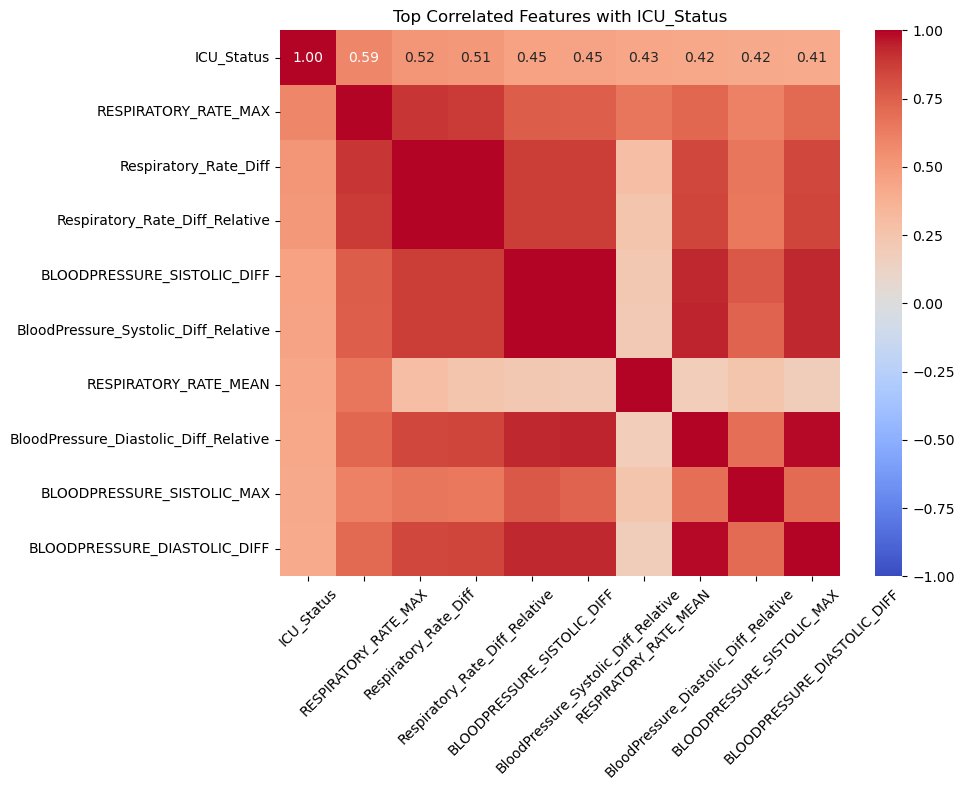

In [23]:
#Correlation Heatmap of Top Features: Displaying relationships between numerical features 
# Calculating the correlation matrix for numeric columns and selecting top 10 correlated features
numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
top_corr_features = correlation_matrix['ICU_Status'].abs().sort_values(ascending=False).head(10).index

# Creating the correlation matrix for the top correlated features  with the target column 'ICU_Status'
top_corr_matrix = numeric_df[top_corr_features].corr()

# Plotting the heatmap for the top N correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title(f"Top Correlated Features with ICU_Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


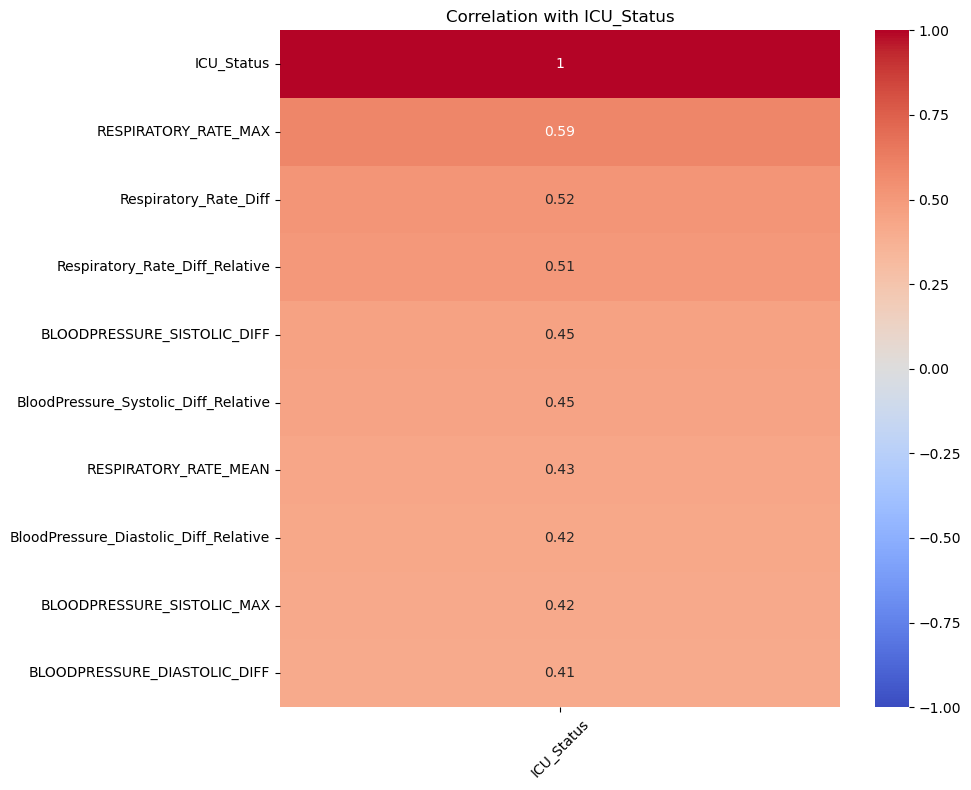

In [24]:

# Correlation Heatmap List for Numerical Features:Displaying top 10 most correlated features
numeric_df = df_cleaned.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_with_target = corr_matrix['ICU_Status'].abs().sort_values(ascending=False)
threshold = 0.1  # Displayed only correlations above 0.1
corr_with_target = corr_with_target[corr_with_target > threshold]
top_n = 10
corr_with_target = corr_with_target.head(top_n)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.xticks(rotation=45) 
plt.title('Correlation with ICU_Status')
plt.tight_layout() 
plt.show()

Histogram of key statistical properties :The histograms visualize the distribution of Respiratory Rate Difference Relative and Blood Pressure Systolic Difference across the patient dataset.
The mean, standard deviation, and coefficient of variation are displayed at the top of each plot, offering a statistical summary of each feature.
The majority of patients have a negative difference in their respiratory rate, with a large concentration around -1. This indicates that many patients' respiratory rates are lower than baseline.
The mean is around -0.83, suggesting that on average, patients exhibit a lower-than-baseline respiratory rate.
However, there is a small tail of patients with positive respiratory rate differences, indicating a small proportion of patients whose respiratory rates are elevated.
A similar pattern is seen for Blood Pressure Systolic Difference, where most patients show negative differences, with a peak around -1.
The mean value is around -0.82, showing that systolic blood pressure tends to be lower than normal for most patients.
Positive deviations exist but are relatively rare, indicating that a small subset of patients experience significantly higher blood pressure than baseline.
Insights:
The sharp peak at -1 in both features suggests that many patients' vital signs are suppressed or below normal. F

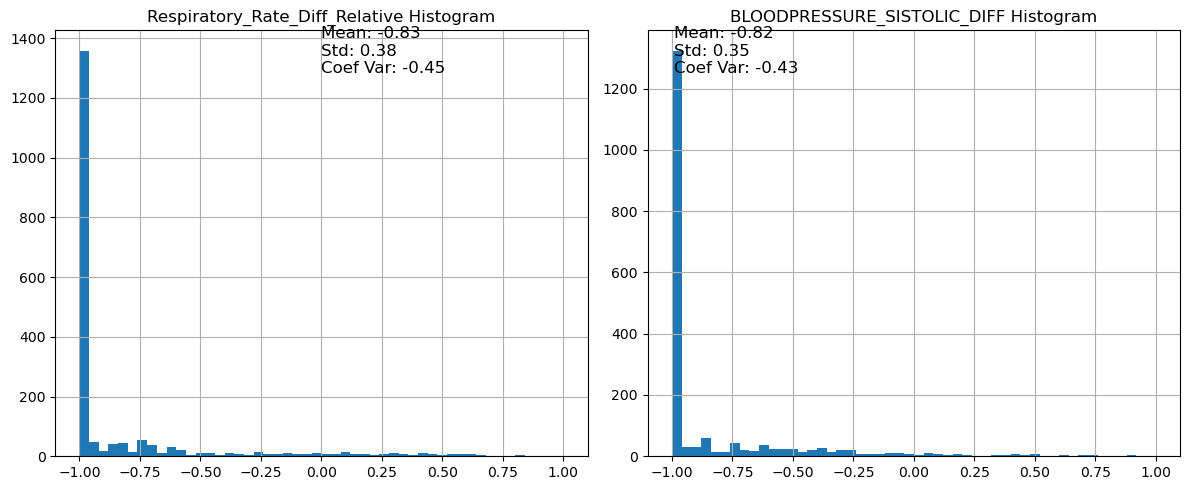

In [26]:
#Histogram of key statistical properties (mean, sd, and coefficient of var) for selected features
from scipy.stats import variation
import matplotlib.pyplot as plt

col_1 = 'Respiratory_Rate_Diff_Relative'
col_2 = 'BLOODPRESSURE_SISTOLIC_DIFF'

# Calculate statistical properties for the first column
mean_col_1 = df_cleaned[col_1].mean()
std_col_1 = df_cleaned[col_1].std()
coef_var_col_1 = variation(df_cleaned[col_1])

# Calculate statistical properties for the second column
mean_col_2 = df_cleaned[col_2].mean()
std_col_2 = df_cleaned[col_2].std()
coef_var_col_2 = variation(df_cleaned[col_2])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_cleaned[col_1].hist(bins=50, ax=axes[0])
axes[0].text(0.5, 0.9, f'Mean: {mean_col_1:.2f}\nStd: {std_col_1:.2f}\nCoef Var: {coef_var_col_1:.2f}', 
             transform=axes[0].transAxes, fontsize=12)
axes[0].set_title(f'{col_1} Histogram')

df_cleaned[col_2].hist(bins=50, ax=axes[1])
axes[1].text(0.05, 0.9, f'Mean: {mean_col_2:.2f}\nStd: {std_col_2:.2f}\nCoef Var: {coef_var_col_2:.2f}', 
             transform=axes[1].transAxes, fontsize=12)
axes[1].set_title(f'{col_2} Histogram')
plt.tight_layout()
plt.show()


Correlation Heatmap for Absolute and Relative Key Features with respect to ICU status.
The heatmap helps in understanding whether absolute or relative values of features are more correlated with ICU admissions.
Insight:

Strong correlations are observed between absolute and relative differences, such as BloodPressure_Systolic_Diff and BloodPressure_Systolic_Diff_Relative, indicating that both metrics are important for predicting ICU admission.
RESPIRATORY_RATE_MAX remains a significant predictor across both absolute and relative measures, further emphasizing its importance in the model.

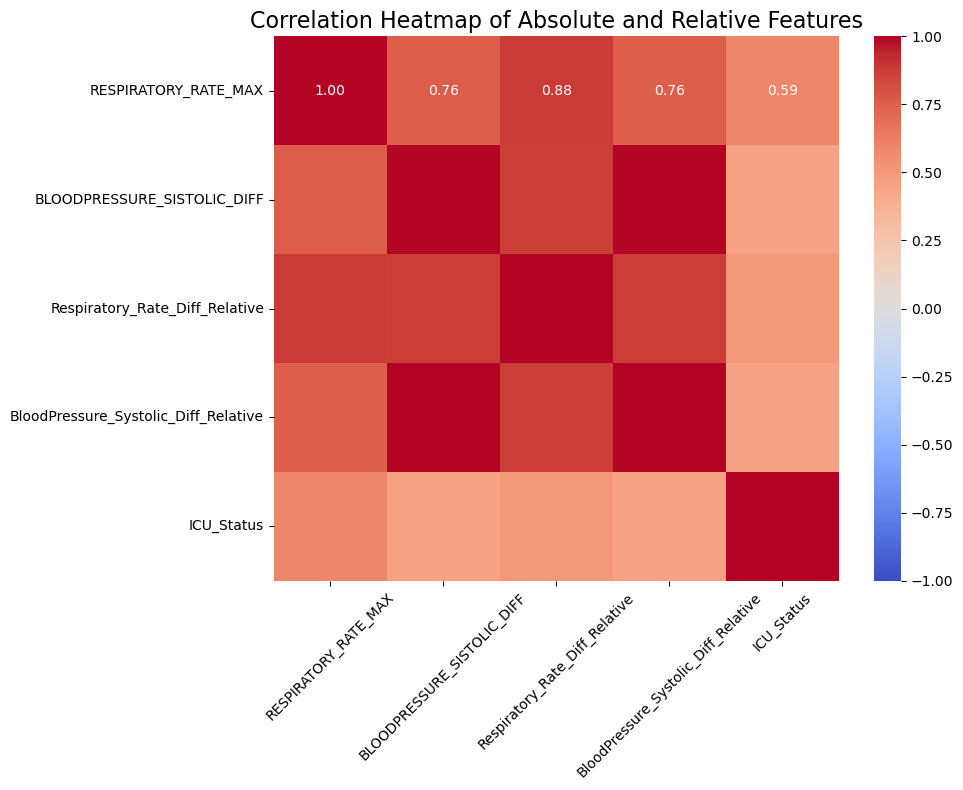

In [27]:
#Correlation Heatmap for Absolute and Relative Key Features
features = ['RESPIRATORY_RATE_MAX', 'BLOODPRESSURE_SISTOLIC_DIFF', 
            'Respiratory_Rate_Diff_Relative', 'BloodPressure_Systolic_Diff_Relative', 'ICU_Status']
correlation_matrix = df_cleaned[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Absolute and Relative Features", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Violin Plot of Key Vital Sign Differences by ICU Status:These violin plots visualize the distribution of the selected vital sign differences for ICU-admitted  and non-ICU patients 
The plot combines a boxplot with a density estimate, showing both the range and concentration of values for each feature across the two patient groups.
ICU-admitted patients tend to have a wider distribution of systolic blood pressure differences, with a significant number showing larger positive differences. Non-ICU patients show a tighter distribution around -1, indicating lower-than-normal blood pressure.
Insight
Patients with larger positive deviations in both blood pressure and respiratory rate are more likely to be admitted to the ICU. These features can be used to flag at-risk patients for closer monitoring.


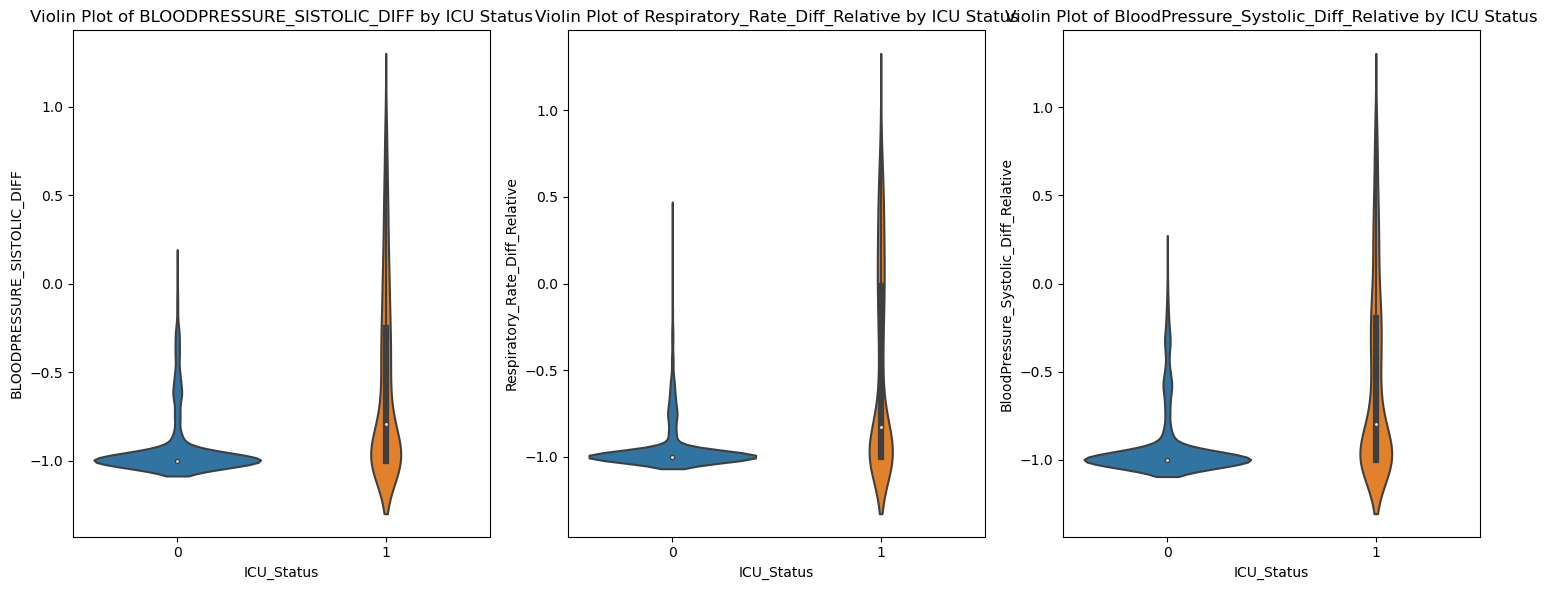

In [ ]:
#Violin Plot of Key Features by ICU Status
import matplotlib.pyplot as plt
import seaborn as sns
key_features = [
    'BLOODPRESSURE_SISTOLIC_DIFF', 
    'Respiratory_Rate_Diff_Relative', 
    'BloodPressure_Systolic_Diff_Relative'
]
fig, axes = plt.subplots(1, len(key_features), figsize=(15, 6))
for i, feature in enumerate(key_features):
    sns.violinplot(x='ICU_Status', y=feature, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature} by ICU Status')

plt.tight_layout()
plt.show()



Density Plot for Key Features by ICU Status:TThese density plots display the distribution of three key vital sign differences: Blood Pressure Systolic Difference, Respiratory Rate Difference Relative, and Blood Pressure Systolic Difference Relative, separated by ICU admission status.
Insight
The ICU patients consistently display a broader range of values, especially in the positive range. These positive deviations from baseline in vital signs are strong indicators of deteriorating health and should be used to flag patients who may require ICU care for early intervention.
a positive blood pressure systolic difference or respiratory rate difference could trigger additional monitoring or care escalation to prevent further deterioration.

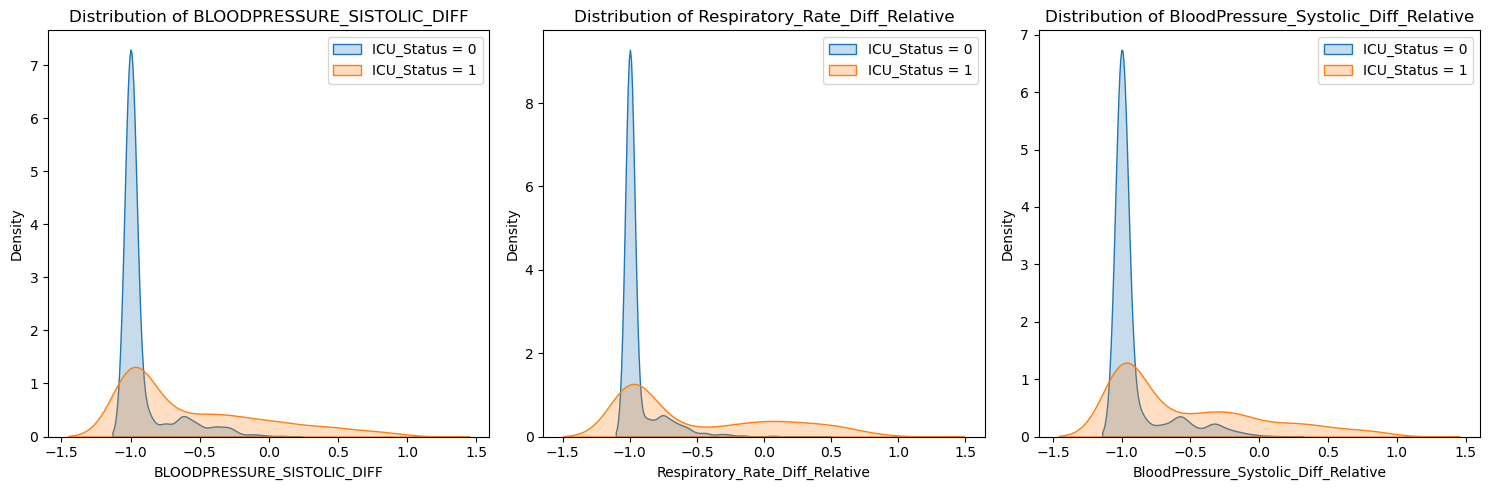

In [ ]:
#Density Plot for Key Features by ICU Status:
import matplotlib.pyplot as plt
import seaborn as sns
num_features = len(key_features)

fig, axes = plt.subplots(1, num_features, figsize=(15, 5))
for i, feature in enumerate(key_features):
    sns.kdeplot(df_cleaned[df_cleaned['ICU_Status'] == 0][feature], label='ICU_Status = 0', fill=True, ax=axes[i])
    sns.kdeplot(df_cleaned[df_cleaned['ICU_Status'] == 1][feature], label='ICU_Status = 1', fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()



Box Plot of Key Features by ICU Status: IS used to visualize the spread and distribution of key features with respect to ICU status helping identify how the distributions differ for ICU-admitted vs. non-ICU patients.
Key Insights:
Insight:
ICU-admitted patients exhibit significantly larger variations in their vital signs, especially in Blood Pressure Systolic Difference and Respiratory Rate Difference Relative 
with the median difference much higher in ICU cases..
The higher variance for ICU-admitted patients suggests greater instability in their physiological state.
These features can be used to create an early-warning system for ICU admissions, where patients with larger deviations in vital signs are flagged for further monitoring.
Respiratory_Rate_Diff_Relative: ICU patients tend to have larger respiratory rate changes, suggesting greater physiological instability.


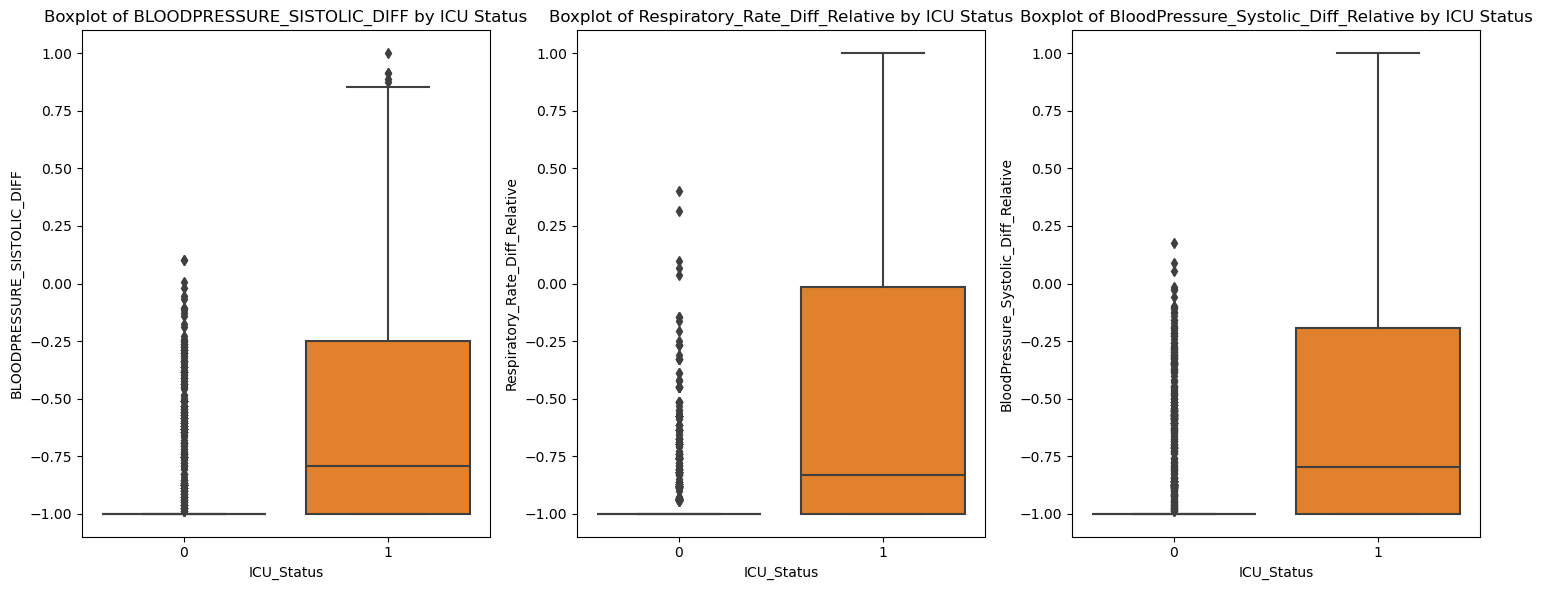

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
key_features = [
    'BLOODPRESSURE_SISTOLIC_DIFF', 
    'Respiratory_Rate_Diff_Relative', 
    'BloodPressure_Systolic_Diff_Relative'
]

fig, axes = plt.subplots(1, len(key_features), figsize=(15, 6))

for i, feature in enumerate(key_features):
    sns.boxplot(x='ICU_Status', y=feature, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by ICU Status')

plt.tight_layout()
plt.show()


Relative Differences in Vital Signs by ICU Status: 
These histograms show the distributions for Blood Pressure Diastolic Difference, Heart Rate Difference, Blood Pressure Systolic Difference, and Temperature Difference, split by ICU Status.
Key Insights:
The consistent pattern across all vital sign features shows that positive deviations from baseline in blood pressure, heart rate, and temperature are common in ICU patients.ICU patients show a broader distribution, with many experiencing positive or near-baseline deviations in systolic blood pressure. This suggests that systolic blood pressure is a critical indicator of patient deterioration. A widening difference between baseline and current blood pressure may signal the need for ICU admission.
ICU patients are more likely to have higher-than-normal temperatures, which could be a marker of critical conditions such as fever or infection.Elevated temperature could be a reliable indicator of worsening conditions, and monitoring this difference could help prioritize patients for ICU care, particularly when combined with other vital signs like blood pressure and heart rate.

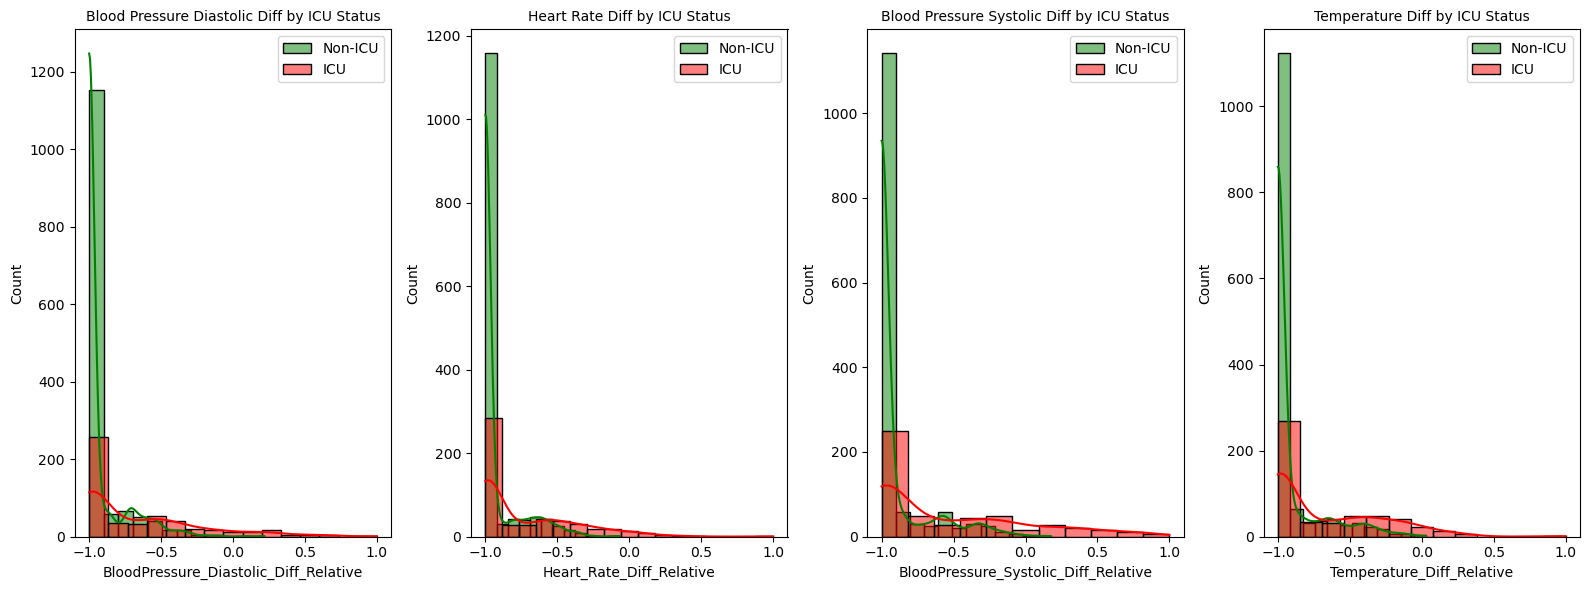

In [32]:
#Relative Differences in Vital Signs by ICU Status: 
import matplotlib.pyplot as plt
import seaborn as sns

# Shortened titles for clarity
titles = ['Blood Pressure Diastolic Diff', 
          'Heart Rate Diff', 
          'Blood Pressure Systolic Diff', 
          'Temperature Diff']

# Assuming df_cleaned contains 'ICU_Status' and the key features
key_features = ['BloodPressure_Diastolic_Diff_Relative', 
                'Heart_Rate_Diff_Relative', 
                'BloodPressure_Systolic_Diff_Relative', 
                'Temperature_Diff_Relative']

# Plot histograms with ICU_Status overlayed
fig, axes = plt.subplots(1, len(key_features), figsize=(16, 6))

for i, (feature, title) in enumerate(zip(key_features, titles)):
    sns.histplot(df_cleaned[df_cleaned['ICU_Status'] == 0][feature], label='Non-ICU', kde=True, color='green', ax=axes[i])
    sns.histplot(df_cleaned[df_cleaned['ICU_Status'] == 1][feature], label='ICU', kde=True, color='red', ax=axes[i])
    axes[i].set_title(f'{title} by ICU Status', fontsize=10)
    axes[i].legend()

# Adjust spacing between plots to prevent overlapping
plt.tight_layout()
plt.show()


CU Status vs. Vital Sign Differences: The scatter plots  visualize the relative differences in key vital signs (Blood Pressure Diastolic, Heart Rate, Blood Pressure Systolic, and Temperature) between patients who were admitted to the ICU and those who were not. 
Key Insights:
These scatter plots suggest that greater variability in vital signs (blood pressure, heart rate, and temperature) is often associated with a higher likelihood of ICU admission. 
Large positive values indicate greater fluctuations in diastolic blood pressure for ICU patients.
ICU patients exhibit larger heart rate variations.
Significant temperature changes are more common among ICU-admitted patients.
This scatter plot clearly indicates that higher deviations in vital signs from baseline are associated with ICU admissions.
This information could be valuable in early identification of patients who may require intensive care, allowing for more proactive and targeted medical interventions.

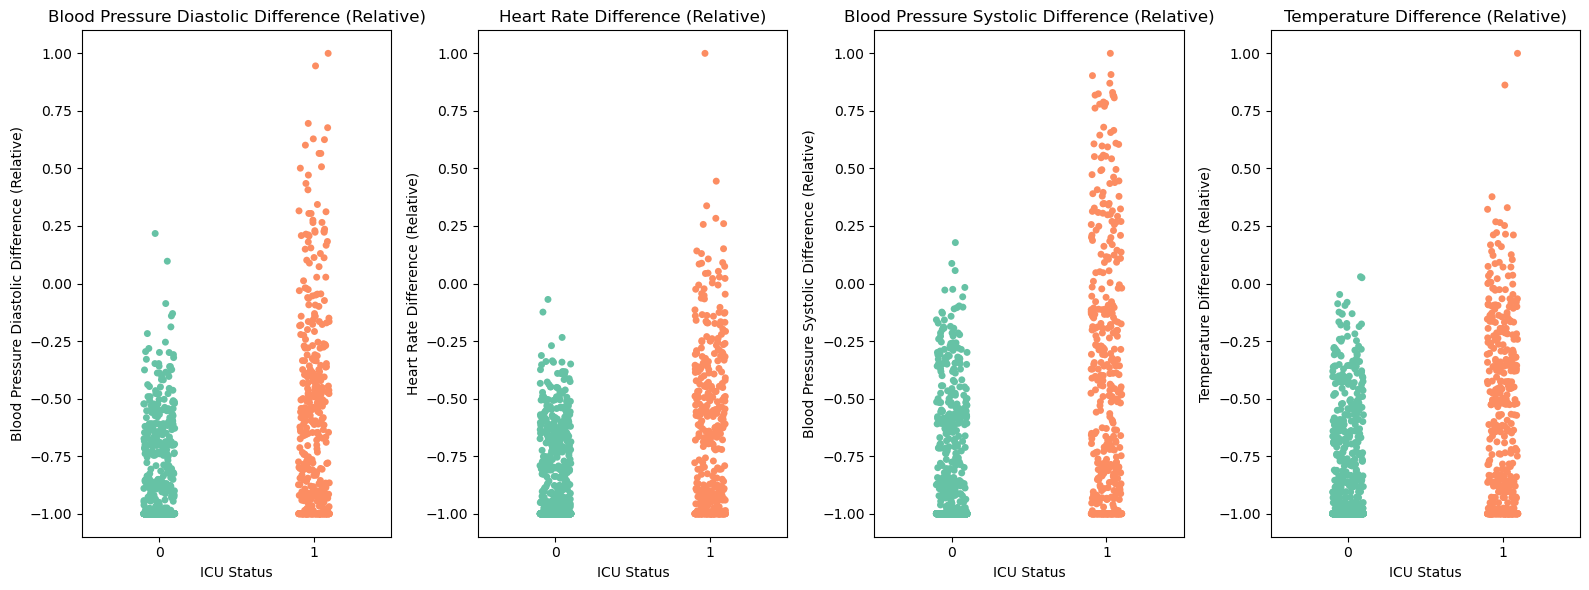

In [33]:
# CU Status vs. Vital Sign Differences Scatter Plot:
key_features = [
    ('BloodPressure_Diastolic_Diff_Relative', 'Blood Pressure Diastolic Difference (Relative)'),
    ('Heart_Rate_Diff_Relative', 'Heart Rate Difference (Relative)'),
    ('BloodPressure_Systolic_Diff_Relative', 'Blood Pressure Systolic Difference (Relative)'),
    ('Temperature_Diff_Relative', 'Temperature Difference (Relative)')
]

fig, axes = plt.subplots(1, len(key_features), figsize=(16, 6))
for i, (feature, title) in enumerate(key_features):
    sns.stripplot(data=df_cleaned, x='ICU_Status', y=feature, jitter=True, ax=axes[i], palette="Set2")
    axes[i].set_title(title)
    axes[i].set_xlabel('ICU Status')
    axes[i].set_ylabel(title)

plt.tight_layout()
plt.show()


Pairplot of Key Features by ICU Status: The pairplot shows the relationships between key features, visualizing the distribution of relative differences in vital signs across ICU-admitted and non-ICU patients.to identify patterns and correlations across multiple features , aiding in understanding how different features interact in relation to ICU admissions.
Key Insights:

ICU-admitted patients (orange) tend to have higher relative differences in vital signs compared to non-ICU patients (green).
There is a clear separation between ICU-admitted and non-admitted patients, particularly for BloodPressure Systolic Diff Relative and Heart Rate Diff Relative.
This suggests that patients with larger deviations from baseline values in their vital signs are more likely to require ICU care.

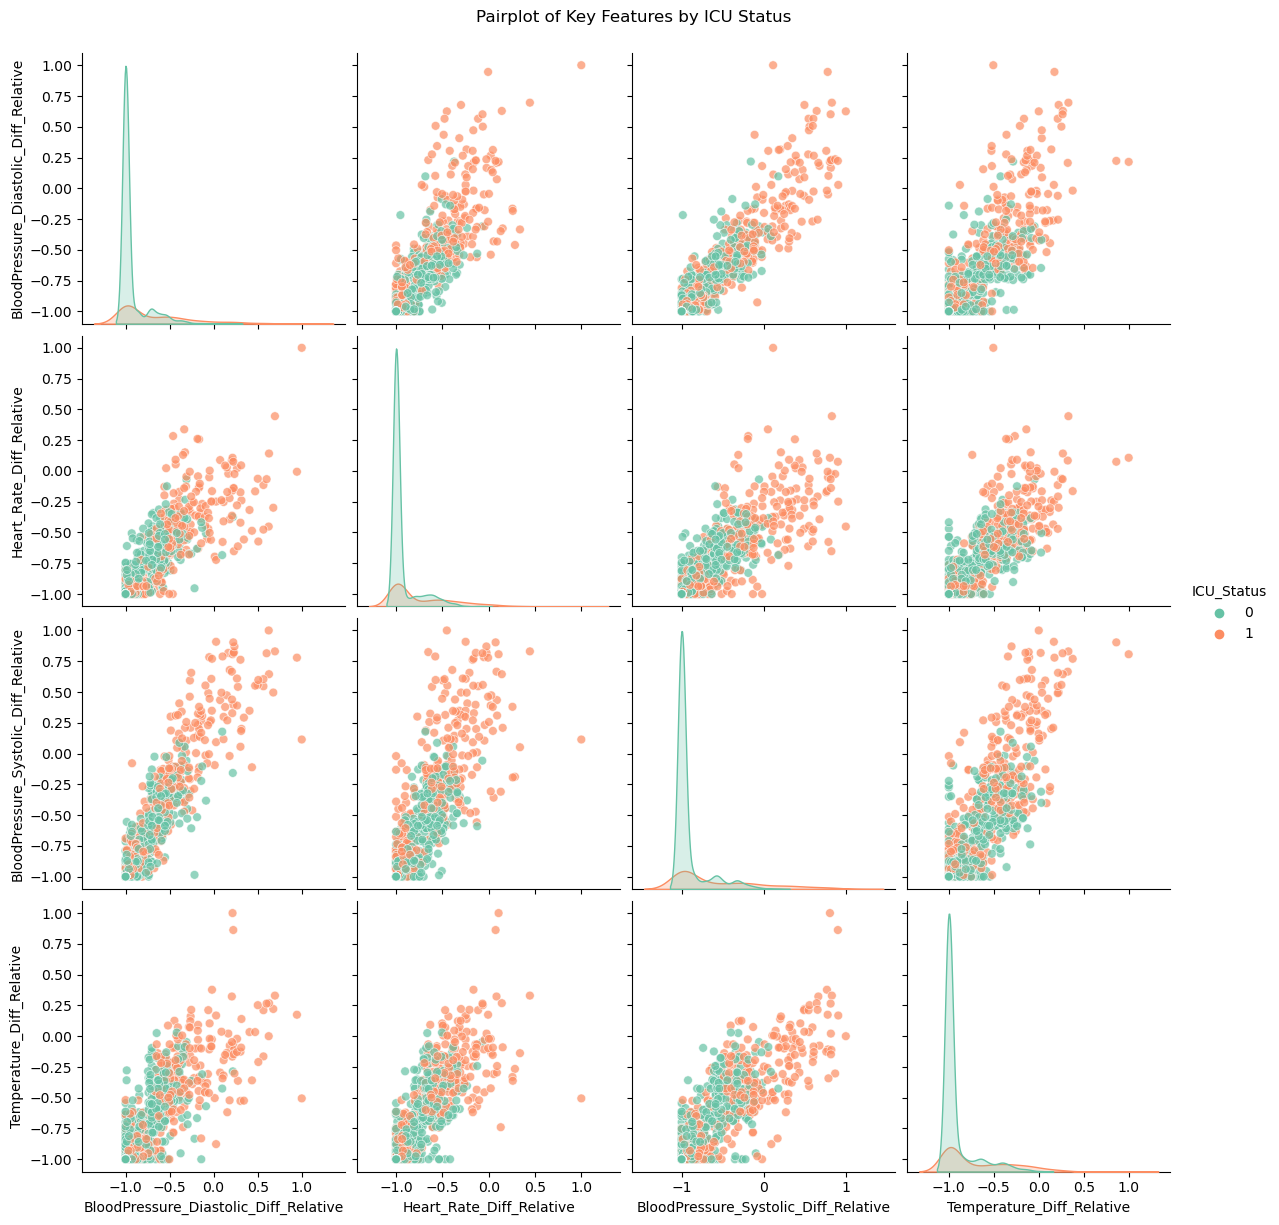

In [34]:
# Pairplot of Key Features by ICU Status
key_features = {
    'BloodPressure_Diastolic_Diff_Relative': 'Blood Pressure Diastolic Difference (Relative)',
    'Heart_Rate_Diff_Relative': 'Heart Rate Difference (Relative)',
    'BloodPressure_Systolic_Diff_Relative': 'Blood Pressure Systolic Difference (Relative)',
    'Temperature_Diff_Relative': 'Temperature Difference (Relative)'
}
for feature in key_features.keys():
    df_cleaned[feature] = pd.to_numeric(df_cleaned[feature], errors='coerce')
sns.pairplot(df_cleaned, vars=list(key_features.keys()), hue='ICU_Status', palette="Set2",
             diag_kind='kde', plot_kws={'alpha': 0.7, 's': 40}, height=3)
plt.suptitle("Pairplot of Key Features by ICU Status", y=1.02)
plt.show()

Violin Plot of ICU Admissions by Age Group: This violin plot visualizes the distribution of ICU admissions across different age groups. The plot indicates that certain age percentiles, especially those above the 60th percentile, have a higher likelihood of ICU admission. The plot effectively highlights the differences in ICU admission rates among various age groups, aiding in the identification of age-related risk factors for ICU admission.
Key Insights:
For most age groups, the distribution of patients not admitted to the ICU is wider and more densely populated compared to those admitted.
60th percentile and above show narrower distributions for non-admitted patients and slightly wider for admitted ones, indicating that older patients have a higher likelihood of being admitted to the ICU.
There’s an increasing trend in ICU admissions as age percentile increases, with the above 90th percentile having the largest variation in ICU admissions.
This plot emphasizes that older patients are more likely to require ICU care, confirming that age is a significant factor in ICU admissions.


  Age_Percentile  ICU_Status
0           60th           0
1           60th           0
2           60th           0
3           60th           0
4           60th           1


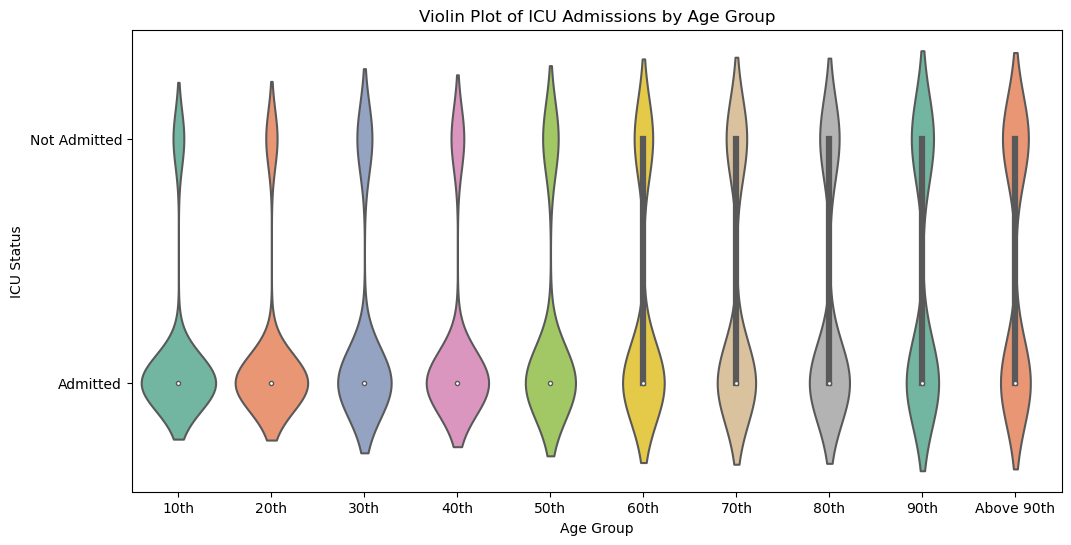

In [36]:
# Violin Plot of ICU Admissions by Age Group:
print(df_cleaned[['Age_Percentile', 'ICU_Status']].head())# Setting the order of age percentiles for consistent display
age_order = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'Above 90th']
df_cleaned['ICU_Status'] = pd.to_numeric(df_cleaned['ICU_Status'], errors='coerce')

df_cleaned['Age_Percentile'] = pd.Categorical(df_cleaned['Age_Percentile'], categories=age_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Age_Percentile', y='ICU_Status', data=df_cleaned, order=age_order, palette="Set2")


plt.title('Violin Plot of ICU Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('ICU Status')
plt.yticks([0, 1], ['Admitted', 'Not Admitted'])
plt.show()

ICU Admission Rate by Age Percentile Bar plot: shows the ICU admission rate for different age percentiles.provides a clear view of how age impacts ICU admission, showing whether older age groups have a higher likelihood of requiring ICU care. The insight gained from this plot is valuable for identifying at-risk age groups and tailoring medical interventions accordingly.
Key Insights:
The bar chart visualizes ICU admission rates across different age percentiles.
ICU admission rates increase steadily with age:
The 10th to 40th percentiles show relatively low ICU admission rates, ranging from 0.1 to 0.25.
ICU admissions start increasing more significantly around the 50th to 70th percentiles.
The 90th and above 90th percentiles show the highest ICU admission rates, with above 90th percentile having the highest rate at around 0.45.
This demonstrates a strong correlation between advanced age and the likelihood of ICU admission, indicating that older patients are at greater risk of severe COVID-19 outcomes.

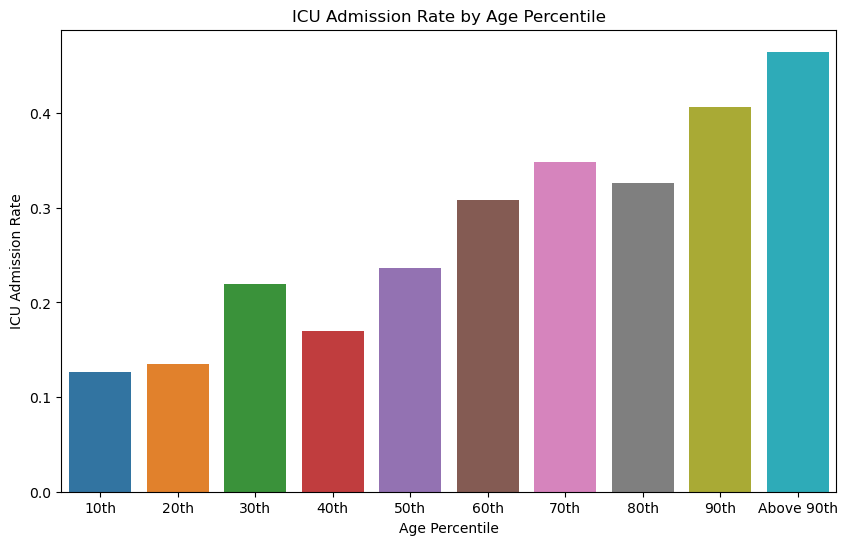

In [76]:
# ICU admission rate by age percentile
plt.figure(figsize=(10, 6))
age_group_icu_rate = df_cleaned.groupby('Age_Percentile')['ICU_Status'].mean()
sns.barplot(x=age_group_icu_rate.index, y=age_group_icu_rate.values)
plt.title('ICU Admission Rate by Age Percentile')
plt.xlabel('Age Percentile')
plt.ylabel('ICU Admission Rate')
plt.show()

ICU Admissions by Gender Pie Chart: This pie chart shows the distribution of ICU admissions by gender. It visualizes the percentage of female and male patients who were admitted to the ICU. In this example, 63.2% of the patients admitted to the ICU were female, while 36.8% were male.
Key Insights:
This pie chart shows the gender distribution of ICU admissions.
63.1% of ICU admissions are female, while 36.9% are male.
This indicates that, in this dataset, females are more likely to be admitted to the ICU compared to males.
Understanding gender differences in ICU admissions can be crucial for designing gender-specific interventions and understanding risk factors for COVID-19 severity.

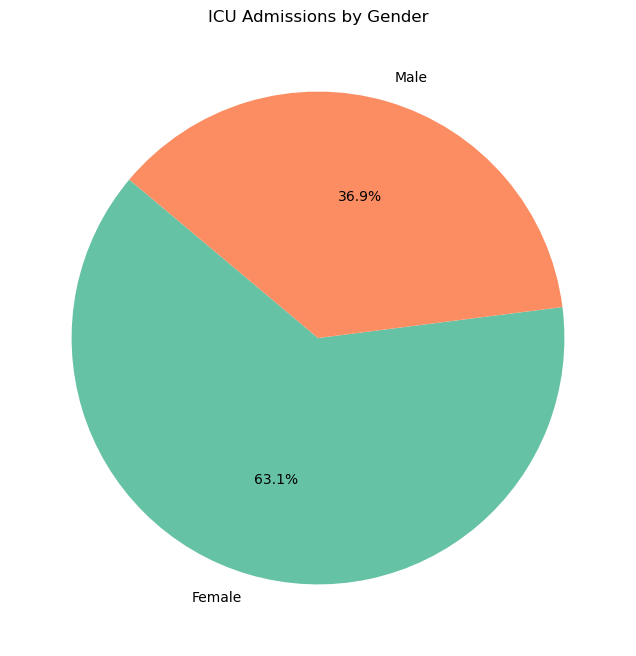

In [38]:
# ICU Admissions by Gender Pie Chart: 
gender_distribution = df_cleaned['Gender'].value_counts()

labels = ['Female', 'Male']
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_distribution, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=140)
ax.set_title('ICU Admissions by Gender')
plt.show()


ICU Admissions  by Age Group and Gender Stacked Bar Plot: This stacked bar chart illustrates the distribution of ICU admissions across different age groups, separated by gender. Each bar represents an age percentile, and the segments within the bars indicate the count of patients who were admitted or not admitted to the ICU, broken down by gender. The chart reveals that ICU admission rates are generally higher among older age groups, with notable differences in admission rates between males and females.
Key Insights:
This stacked bar chart shows the distribution of ICU admissions by both age percentile and gender.
In all age percentiles, more females are admitted to the ICU than males, with the largest difference observed in the above 90th percentile.
As age increases, the proportion of ICU admissions increases for both genders, but female patients consistently represent a larger share of ICU admissions across all age groups.
The chart also reveals that ICU admissions increase sharply in the 70th percentile and above, with a higher rate of admissions for females compared to males in each age group.
This visual clearly highlights the combined effects of age and gender on ICU admissions, with older age and female gender being significant predictors of ICU need.


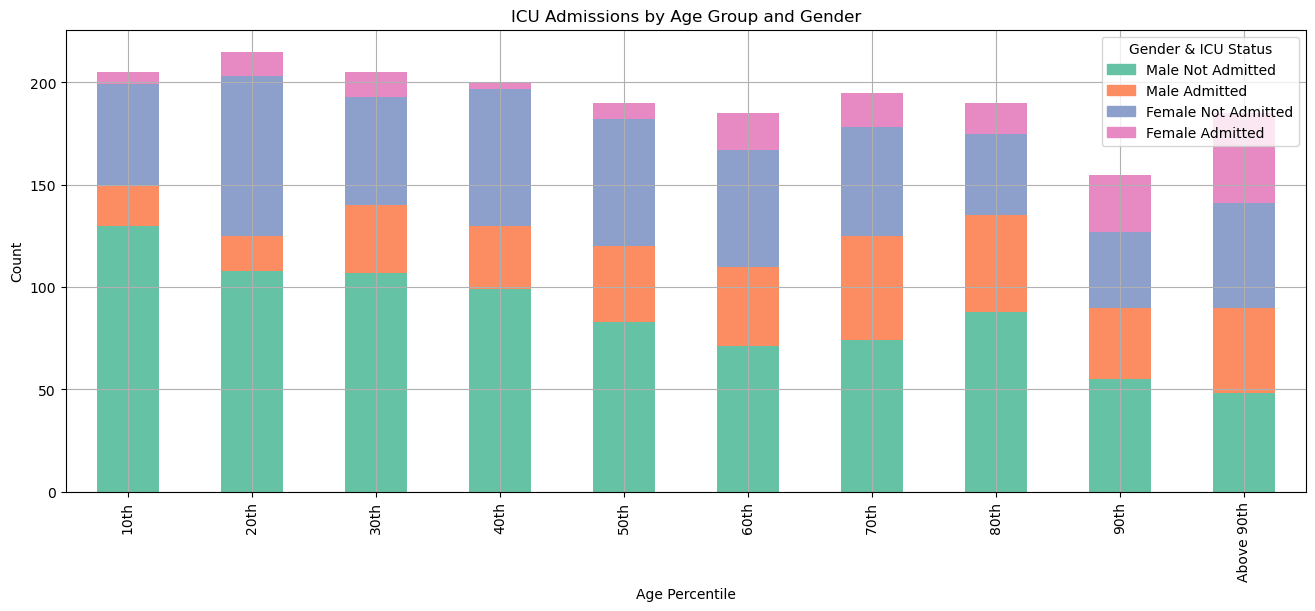

In [39]:
#ICU Admissions  by Age Group and Gender Stacked Bar Plot:
import matplotlib.patches as mpatches
df_cleaned['ICU_Gender'] = df_cleaned['Gender'].astype(str) + " & " + df_cleaned['ICU_Status'].astype(str)
pivot_table = pd.pivot_table(df_cleaned, values='PATIENT_VISIT_IDENTIFIER', index='Age_Percentile', columns='ICU_Gender', aggfunc='count', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(16, 6), color=sns.color_palette("Set2", n_colors=len(pivot_table.columns)))

plt.title("ICU Admissions by Age Group and Gender")
plt.xlabel("Age Percentile")
plt.ylabel("Count")
plt.grid(True)

legend_labels = [
    mpatches.Patch(color=sns.color_palette('Set2')[0], label='Male Not Admitted'),
    mpatches.Patch(color=sns.color_palette('Set2')[1], label='Male Admitted'),
    mpatches.Patch(color=sns.color_palette('Set2')[2], label='Female Not Admitted'),
    mpatches.Patch(color=sns.color_palette('Set2')[3], label='Female Admitted')
]
plt.legend(handles=legend_labels, title='Gender & ICU Status')
plt.show()


In [41]:
# Checking for any NaN or unexpected data types in 'ICU_Status' the terget variable
print(df_cleaned['ICU_Status'].dtype)  
# Checking if we can access the column
print(df_cleaned['ICU_Status'].head())
print(df_cleaned.columns)
# Defining the categorical and numeric columns
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_columns)


int64
0    0
1    0
2    0
3    0
4    1
Name: ICU_Status, dtype: int64
Index(['PATIENT_VISIT_IDENTIFIER', 'Age_Above_65', 'Age_Percentile', 'Gender',
       'Disease_Group_1', 'Disease_Group_2', 'Disease_Group_3',
       'Disease_Group_4', 'Disease_Group_5', 'Disease_Group_6',
       ...
       'OXYGEN_SATURATION_DIFF', 'BloodPressure_Diastolic_Diff_Relative',
       'BloodPressure_Systolic_Diff_Relative', 'Heart_Rate_Diff_Relative',
       'Respiratory_Rate_Diff_Relative', 'Temperature_Diff_Relative',
       'Oxygen_Saturation_Diff_Relative', 'WINDOW', 'ICU_Status',
       'ICU_Gender'],
      dtype='object', length=232)
Categorical columns: Index(['Age_Percentile', 'ICU_Gender'], dtype='object')
Numeric columns: Index(['PATIENT_VISIT_IDENTIFIER', 'Age_Above_65', 'Gender', 'Disease_Group_1',
       'Disease_Group_2', 'Disease_Group_3', 'Disease_Group_4',
       'Disease_Group_5', 'Disease_Group_6', 'HTN',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BloodPr

In [42]:
# Defining the numeric columns, excluding 'ICU_Status'
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('ICU_Status')  # Exclude ICU_Status from scaling

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transform the numeric columns
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Verifyinf the scaling
print("First 10 rows after scaling:")
display(df_cleaned.head(10))


First 10 rows after scaling:


,PATIENT_VISIT_IDENTIFIER,Age_Above_65,Age_Percentile,Gender,Disease_Group_1,Disease_Group_2,Disease_Group_3,Disease_Group_4,Disease_Group_5,Disease_Group_6,...,OXYGEN_SATURATION_DIFF,BloodPressure_Diastolic_Diff_Relative,BloodPressure_Systolic_Diff_Relative,Heart_Rate_Diff_Relative,Respiratory_Rate_Diff_Relative,Temperature_Diff_Relative,Oxygen_Saturation_Diff_Relative,WINDOW,ICU_Status,ICU_Gender
0,-1.727558,1.067187,60th,-0.764436,-0.348054,-0.169887,-0.328987,-0.141908,2.612509,4.515406,...,-0.298095,-0.490398,-0.504481,-0.502250,-0.457987,-0.528545,-0.298037,NaN,0,0 & 0
1,-1.727558,1.067187,60th,-0.764436,-0.348054,-0.169887,-0.328987,-0.141908,2.612509,4.515406,...,-0.298095,-0.490398,-0.504481,-0.502250,-0.457987,-0.528545,-0.298037,NaN,0,0 & 0
2,-1.727558,1.067187,60th,-0.764436,-0.348054,-0.169887,-0.328987,-0.141908,2.612509,4.515406,...,-0.298095,-0.490398,-0.504481,-0.502250,-0.457987,-0.528545,-0.298037,NaN,0,0 & 0
3,-1.727558,1.067187,60th,-0.764436,-0.348054,-0.169887,-0.328987,-0.141908,2.612509,4.515406,...,-0.298095,-0.490398,-0.504481,-0.502250,-0.457987,-0.528545,-0.298037,NaN,0,0 & 0
4,-1.727558,1.067187,60th,-0.764436,-0.348054,-0.169887,-0.328987,-0.141908,2.612509,4.515406,...,0.448403,1.689950,3.376357,2.790894,2.467139,2.210180,0.462258,NaN,1,0 & 1
5,-1.718560,1.067187,90th,1.308154,-0.348054,-0.169887,-0.328987,-0.141908,-0.382774,-0.221464,...,-0.298095,-0.490398,-0.504481,-0.502250,-0.457987,-0.528545,-0.298037,NaN,1,1 & 1
6,-1.718560,1.067187,90th,1.308154,-0.348054,-0.169887,-0.328987,-0.141908,-0.382774,-0.221464,...,-0.298095,-0.490398,-0.504481,-0.502250,-0.457987,-0.528545,-0.298037,NaN,1,1 & 1
7,-1.718560,1.067187,90th,1.308154,-0.348054,-0.169887,-0.328987,-0.141908,-0.382774,-0.221464,...,-0.298095,-0.490398,-0.504481,-0.502250,-0.457987,-0.528545,-0.298037,NaN,1,1 & 1
8,-1.718560,1.067187,90th,1.308154,-0.348054,-0.169887,-0.328987,-0.141908,-0.382774,-0.221464,...,-0.298095,-0.157404,-0.038888,-0.249625,0.029534,-0.104117,-0.298037,NaN,1,1 & 1
9,-1.718560,1.067187,90th,1.308154,-0.348054,-0.169887,-0.328987,-0.141908,2.612509,-0.221464,...,0.531348,4.212069,2.805080,2.752152,3.929702,3.590860,0.511900,NaN,1,1 & 1


In [45]:
#Defining Categorical Columns:
existing_categorical_cols = ['Age_Percentile', 'Gender']

#Additional categorical columns
additional_categorical_cols = [
    'Gender', 'Disease_Group_1', 'Disease_Group_2',
    'Disease_Group_3', 'Disease_Group_4', 'Disease_Group_5', 'Disease_Group_6',
    'WINDOW'
]
categorical_cols = list(set(existing_categorical_cols + additional_categorical_cols))

#Final list of categorical columns
print("Final categorical columns:", categorical_cols)

Final categorical columns: ['Disease_Group_2', 'Disease_Group_3', 'WINDOW', 'Disease_Group_6', 'Disease_Group_1', 'Disease_Group_4', 'Age_Percentile', 'Disease_Group_5', 'Gender']


In [47]:
# Exclude PATIENT_VISIT_IDENTIFIER, ICU_Status, and possibly WINDOW from numeric columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.difference(['PATIENT_VISIT_IDENTIFIER', 'ICU_Status', 'WINDOW'])
print(f"Final numeric columns: {numeric_cols}")


Final numeric columns: Index(['Age_Above_65', 'Albumin_Diff', 'Albumin_Max', 'Albumin_Mean',
       'Albumin_Median', 'Albumin_Min', 'BE_ARTERIAL_DIFF', 'BE_ARTERIAL_MAX',
       'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MEDIAN',
       ...
       'TTPA_MAX', 'TTPA_MEAN', 'TTPA_MEDIAN', 'TTPA_MIN',
       'Temperature_Diff_Relative', 'UREA_DIFF', 'UREA_MAX', 'UREA_MEAN',
       'UREA_MEDIAN', 'UREA_MIN'],
      dtype='object', length=227)


In [52]:
# Applying the preprocessing pipeline to both X_train and X_test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
# Train a RandomForestClassifier to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Get feature importances and select the top 64 features
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-64:]  # Get indices of top 64 features

# Select only the top 64 features from the transformed data
X_train_top64 = X_train_transformed[:, indices]
X_test_top64 = X_test_transformed[:, indices]


Model Comparison:

Gradient Boosting and the Voting Classifier perform the best overall, particularly with ICU patients.
Random Forest has a strong performance but struggles with ICU recall, which is crucial for identifying critical cases.
Logistic Regression performs well as a baseline but doesn’t capture the more complex relationships in the data as effectively as the ensemble methods (Random Forest and Gradient Boosting).

In [57]:
#Accuracy Scores and Classification Reports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# 2. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_processed, y_train)
y_pred_gb = gb_model.predict(X_test_processed)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

# 3. Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
voting_clf.fit(X_train_processed, y_train)
y_pred_voting = voting_clf.predict(X_test_processed)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")

# 4. Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_processed, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_processed)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# Classification Reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Random Forest Accuracy: 0.8545
Gradient Boosting Accuracy: 0.8753
Voting Classifier Accuracy: 0.8701
Logistic Regression Accuracy: 0.8597
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       284
           1       0.78      0.61      0.69       101

    accuracy                           0.85       385
   macro avg       0.83      0.78      0.80       385
weighted avg       0.85      0.85      0.85       385

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       284
           1       0.83      0.66      0.74       101

    accuracy                           0.88       385
   macro avg       0.86      0.81      0.83       385
weighted avg       0.87      0.88      0.87       385

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95 

Insights from Confusion Matrices:
Gradient Boosting has the highest number of true positives, meaning it is the best model for identifying ICU patients.
Voting Classifier and Logistic Regression provide a balance between precision and recall, while Random Forest misses more ICU patients.
In terms of false positives, Voting Classifier performs best, with the fewest false positives (13), meaning fewer patients are unnecessarily flagged for ICU admission.

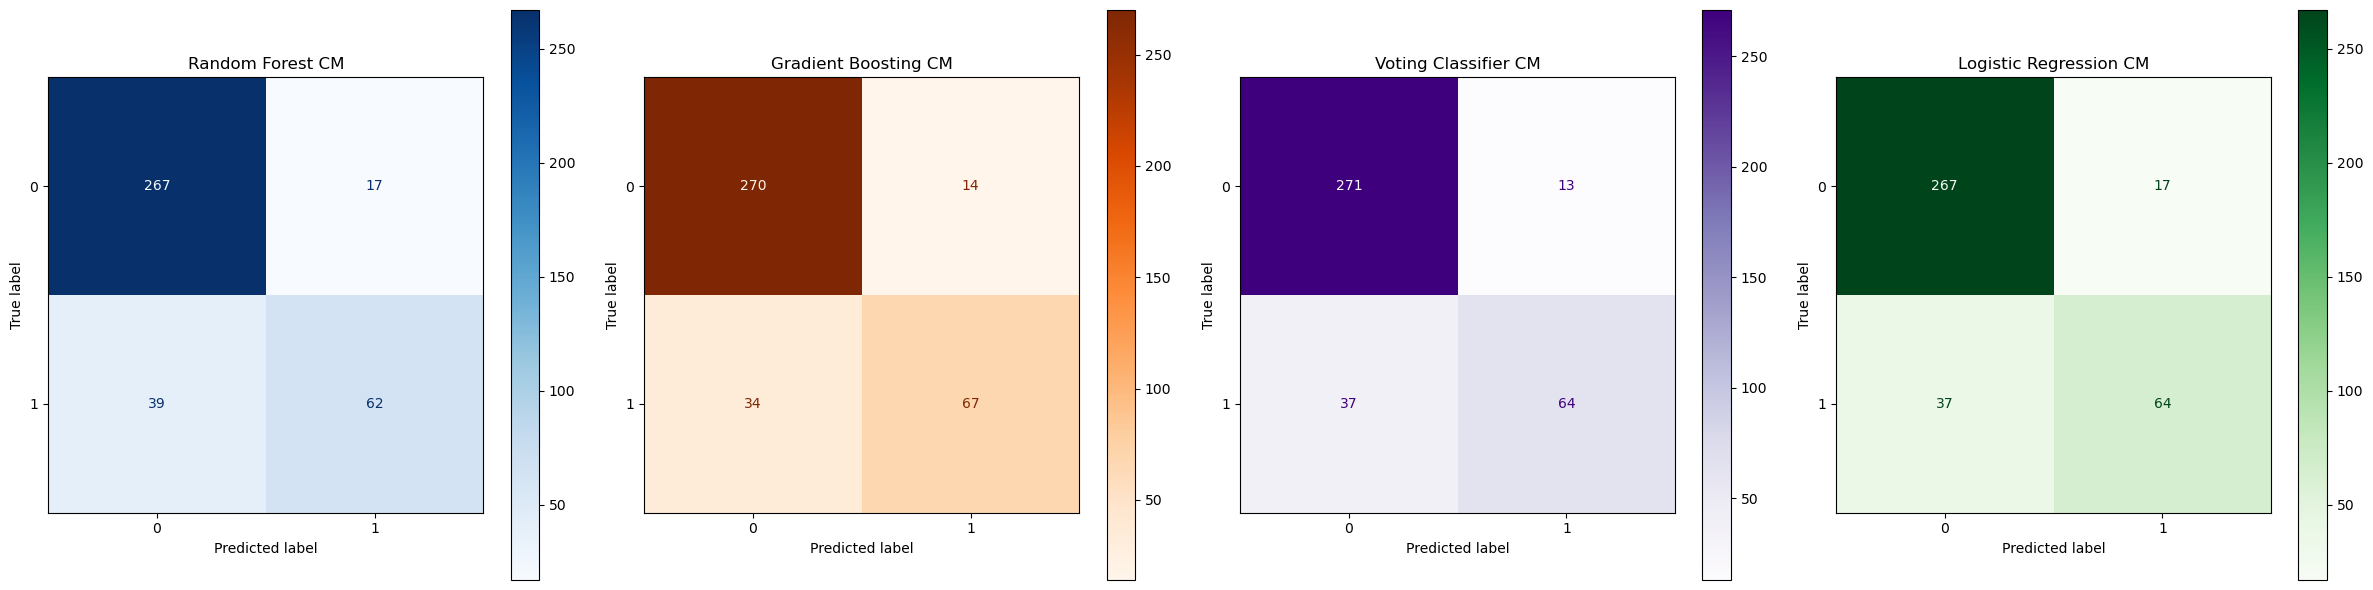

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot Confusion Matrices for all models
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest CM')

# Gradient Boosting Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot(ax=axes[1], cmap='Oranges')
axes[1].set_title('Gradient Boosting CM')

# Voting Classifier Confusion Matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting)
disp_voting.plot(ax=axes[2], cmap='Purples')
axes[2].set_title('Voting Classifier CM')

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot(ax=axes[3], cmap='Greens')
axes[3].set_title('Logistic Regression CM')

plt.tight_layout()
plt.show()


Insights from the ROC Curve for All Models
Gradient Boosting or Voting Classifier should be favored when seeking the most accurate model for predicting ICU admissions, as they have the highest AUC values and better balance between sensitivity and specificity.
Random Forest and Logistic Regression are still viable models, particularly if interpretability or simpler model structures are desired, but their AUCs suggest a slightly weaker performance compared to the ensemble methods.
In terms of performance metrics, Gradient Boosting and Voting Classifier seem to provide the best balance and should be prioritized depending on the overall project goals.

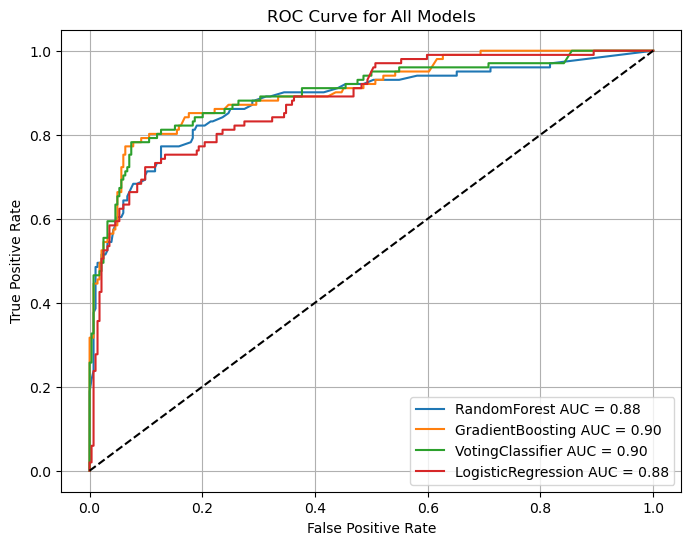

In [59]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# ROC Curves for all models
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_processed)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test_processed)[:, 1])
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_clf.predict_proba(X_test_processed)[:, 1])
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg_model.predict_proba(X_test_processed)[:, 1])

# AUC values
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_voting = auc(fpr_voting, tpr_voting)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest AUC = {roc_auc_rf:.2f}")
plt.plot(fpr_gb, tpr_gb, label=f"GradientBoosting AUC = {roc_auc_gb:.2f}")
plt.plot(fpr_voting, tpr_voting, label=f"VotingClassifier AUC = {roc_auc_voting:.2f}")
plt.plot(fpr_log_reg, tpr_log_reg, label=f"LogisticRegression AUC = {roc_auc_log_reg:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Feature Importance (Random Forest)
We used RandomForestClassifier to extract feature importance and plot it  to see which features have the most influence on the predictions.inimum diastolic blood pressure plays a significant role in determining whether a patient will require ICU admission.Oxygen Saturation ranks second in importance, highlighting the critical role of oxygen levels in predicting ICU admissions.
Respiratory and Blood Pressure Features also rank high, reinforcing the importance of respiratory and cardiovascular measures in ICU prediction. Glucose and GGT Levels are also influential in predicting ICU admissions.


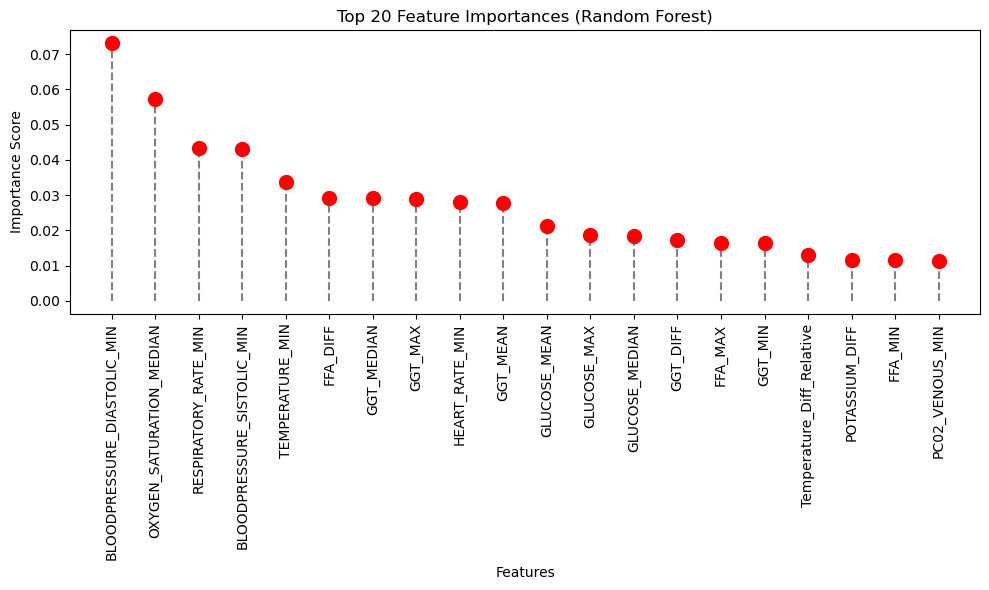

In [93]:
#Feature Importance (Random Forest)import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the preprocessed data and RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top features (you can adjust how many to show)
top_n = 20  # Show top 20 features for example
top_features = [X.columns[i] for i in indices[:top_n]]

# Plot the lollipop chart
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances (Random Forest)")

# Create lollipop lines
for i in range(top_n):
    plt.plot([i, i], [0, importances[indices[i]]], color='gray', linestyle='--')  # Line

# Add circular markers at the end of the lines
plt.scatter(range(top_n), importances[indices[:top_n]], color='red', s=100, zorder=3)

# Customize x-axis
plt.xticks(range(top_n), top_features, rotation=90)

# Add labels and formatting
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()

# Show the plot
plt.show()




 Grid Search for Hyperparameter Tuning:
 Overall, the model after tuning seems to perform better in terms of recall for both classes . It’s evident that the Gradient Boosting model is well-balanced, with fewer false positives and false negatives.
The improvement in the confusion matrix shows that the model is more accurate in identifying both ICU and non-ICU cases, which indicates successful hyperparameter tuning.

Best Parameters found by GridSearch:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy found by GridSearch: 0.8779
Best Gradient Boosting Accuracy after GridSearch: 0.8909


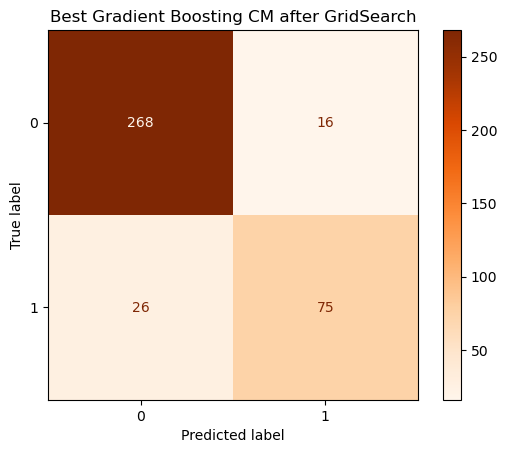

Classification Report for Best Gradient Boosting:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       284
           1       0.82      0.74      0.78       101

    accuracy                           0.89       385
   macro avg       0.87      0.84      0.85       385
weighted avg       0.89      0.89      0.89       385



In [61]:
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Gradient Boosting
param_grid = {
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train_processed, y_train)

# Print the best parameters and best score
print("Best Parameters found by GridSearch: ", grid_search.best_params_)
print("Best Accuracy found by GridSearch: {:.4f}".format(grid_search.best_score_))

# Use the best estimator to make predictions on the test set
best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_processed)

# Evaluate the final model's accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Best Gradient Boosting Accuracy after GridSearch: {accuracy_gb:.4f}")

# Confusion matrix and classification report
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot(cmap='Oranges')
plt.title('Best Gradient Boosting CM after GridSearch')
plt.show()

print("Classification Report for Best Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))



Applying SMOTE to handle class imbalance: To balance the class distribution, specifically oversampling the minority class . We applied SMOTE and Used Cross-Validation
We used Stratified K-Fold Cross-Validation to ensure the model's generalization. Cross-validation splitted the dataset into different folds and train/test on each fold to avoid overfitting. We retrained and Evaluated the Model after SMOTE. Finally, we plotted the ROC curve to compare model performance before and after SMOTE:

Accuracy and ROC AUC: The accuracy improved slightly from 0.8753 to 0.8857 after applying GridSearch and stayed the same after applying SMOTE. However, the ROC AUC remained constant at 0.90 throughout.

Confusion Matrix: There are minor changes in the confusion matrix between the results after GridSearch and after SMOTE, but the differences are marginal. Both methods helped to reduce false negatives (FN) from the original 34 to 26 (after GridSearch) and 27 (after SMOTE). However, false positives (FP) slightly increased after SMOTE.

SMOTE Impact:
The balanced class distribution after SMOTE didn’t change the overall accuracy and ROC AUC significantly. However, it slightly improved the balance between correctly predicting ICU admissions (TP) and non-ICU cases (TN). This is expected when using SMOTE, as it reduces the bias toward the majority class.
Conclusion:
While the results after applying SMOTE didn't dramatically improve, it helped achieve a better class balance in the predictions. The GridSearch seems to have had a more significant impact in optimizing the model's performance.

After SMOTE class distribution:
ICU_Status
0    1126
1    1126
Name: count, dtype: int64
Cross-Validation Accuracy Scores: [0.92904656 0.9113082  0.90222222 0.91555556 0.90444444]
Mean CV Accuracy: 0.9125
Accuracy after SMOTE: 0.8857


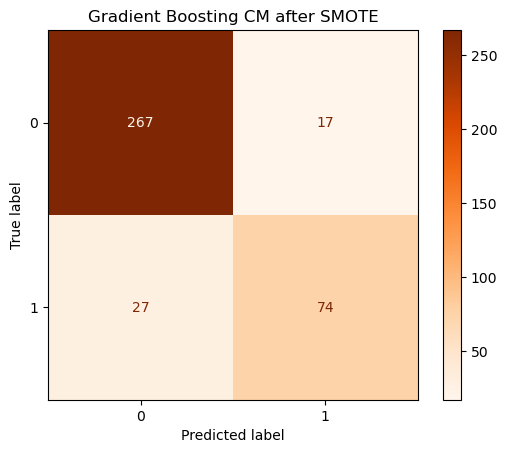

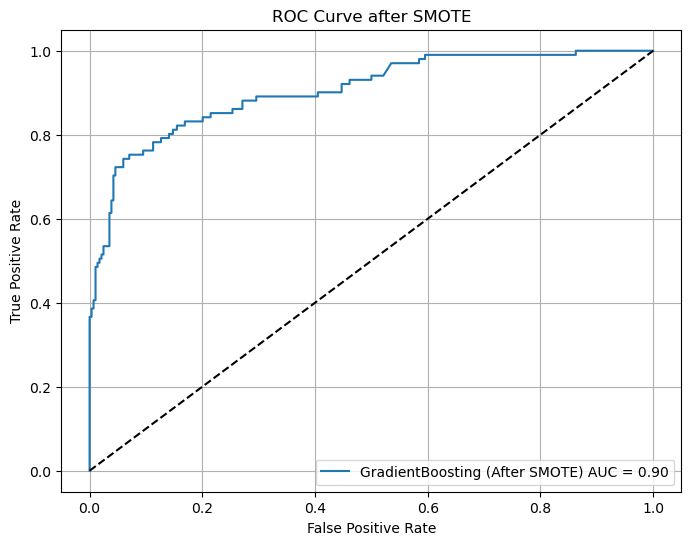

In [75]:
#Applying SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Check class distribution after SMOTE
print("After SMOTE class distribution:")
print(y_train_smote.value_counts())
#Using Cross-Validation
# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate the best model from GridSearch
cross_val_scores = cross_val_score(gb_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean CV Accuracy: {np.mean(cross_val_scores):.4f}")
# Re-train the best Gradient Boosting model after applying SMOTE
gb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = gb_model.predict(X_test_processed)

# Evaluate the accuracy and confusion matrix
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy after SMOTE: {accuracy_smote:.4f}")

# Plot Confusion Matrix after SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote)
disp_smote.plot(cmap='Oranges')
plt.title('Gradient Boosting CM after SMOTE')
plt.show()
fpr_smote, tpr_smote, _ = roc_curve(y_test, gb_model.predict_proba(X_test_processed)[:, 1])
roc_auc_smote = auc(fpr_smote, tpr_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f"GradientBoosting (After SMOTE) AUC = {roc_auc_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




Imagine a tool that allows us to intervene earlier, allocate resources more efficiently, and ultimately save more lives. The predictive model we've developed can do just that. By leveraging real-time data from COVID-19 patients, our model accurately identifies those who are most at risk of requiring ICU admission before their condition becomes critical. With an accuracy rate of 87.5% and a high area under the ROC curve (AUC = 0.90), this model is not only reliable but actionable. Hospitals that implement this solution can prioritize high-risk patients for intensive care, manage bed capacity more effectively, and prevent ICU overflow. In a world where time equals lives, using this data-driven approach can reduce mortality rates and ensure that every patient gets the care they need when they need it most.